In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from glob import glob

In [ ]:
train_path = "/content/drive/MyDrive/Colab Notebooks/bitirme/train"
test_path = "/content/drive/MyDrive/Colab Notebooks/bitirme/test"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "/content/drive/MyDrive/Colab Notebooks/bitirme/train"
test_dir = "/content/drive/MyDrive/Colab Notebooks/bitirme/test"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training resimleri:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode="categorical")

print("Testing resimleri:")
test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="categorical")

Training resimleri:
Found 2380 images belonging to 29 classes.
Testing resimleri:
Found 594 images belonging to 29 classes.


In [ ]:

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:

resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"
mobilenet_url = "https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/tf2-preview-feature-vector/4"

In [ ]:
def create_model(model_url, num_classes=29):

  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False,
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,))


  model = tf.keras.Sequential([
    feature_extractor_layer,
    layers.Dense(num_classes, activation='softmax', name='output_layer')
  ])

  return model

In [ ]:
resnet_model = create_model(resnet_url, num_classes=train_data.num_classes)

resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [ ]:
resnet_history = resnet_model.fit(train_data,
                   epochs=10,
                   steps_per_epoch=len(train_data),
                   validation_data=test_data,
                   validation_steps=len(test_data),)

Epoch 1/10
75/75 [==============================] - 2613s 35s/step - loss: 2.1333 - accuracy: 0.4483 - val_loss: 1.0868 - val_accuracy: 0.7492
Epoch 2/10
75/75 [==============================] - 19s 257ms/step - loss: 0.6427 - accuracy: 0.8992 - val_loss: 0.6019 - val_accuracy: 0.8855
Epoch 3/10
75/75 [==============================] - 21s 277ms/step - loss: 0.3253 - accuracy: 0.9697 - val_loss: 0.4152 - val_accuracy: 0.9242
Epoch 4/10
75/75 [==============================] - 22s 296ms/step - loss: 0.2025 - accuracy: 0.9845 - val_loss: 0.3283 - val_accuracy: 0.9444
Epoch 5/10
75/75 [==============================] - 20s 262ms/step - loss: 0.1419 - accuracy: 0.9908 - val_loss: 0.2718 - val_accuracy: 0.9529
Epoch 6/10
75/75 [==============================] - 20s 264ms/step - loss: 0.1041 - accuracy: 0.9962 - val_loss: 0.2368 - val_accuracy: 0.9562
Epoch 7/10
75/75 [==============================] - 20s 261ms/step - loss: 0.0800 - accuracy: 0.9971 - val_loss: 0.2166 - val_accuracy: 0.9646

In [ ]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

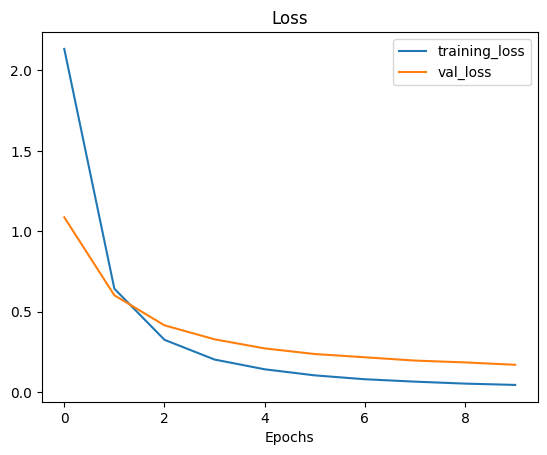

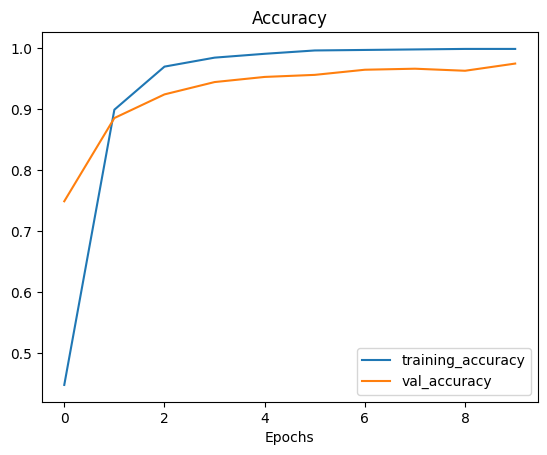

In [ ]:
plot_loss_curves(resnet_history)

In [ ]:
efficientnet_model = create_model(model_url=efficientnet_url,
                                  num_classes=train_data.num_classes)

efficientnet_model.compile(loss='categorical_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])


In [ ]:
efficientnet_history = efficientnet_model.fit(train_data,
                                              epochs=10,
                                              steps_per_epoch=len(train_data),
                                              validation_data=test_data,
                                              validation_steps=len(test_data),)

Epoch 1/10
75/75 [==============================] - 34s 311ms/step - loss: 2.5484 - accuracy: 0.4042 - val_loss: 1.8783 - val_accuracy: 0.6465
Epoch 2/10
75/75 [==============================] - 20s 273ms/step - loss: 1.3678 - accuracy: 0.8294 - val_loss: 1.2265 - val_accuracy: 0.8283
Epoch 3/10
75/75 [==============================] - 21s 277ms/step - loss: 0.8555 - accuracy: 0.9345 - val_loss: 0.8811 - val_accuracy: 0.8939
Epoch 4/10
75/75 [==============================] - 19s 249ms/step - loss: 0.5897 - accuracy: 0.9576 - val_loss: 0.6760 - val_accuracy: 0.9108
Epoch 5/10
75/75 [==============================] - 20s 262ms/step - loss: 0.4359 - accuracy: 0.9727 - val_loss: 0.5501 - val_accuracy: 0.9226
Epoch 6/10
75/75 [==============================] - 21s 282ms/step - loss: 0.3385 - accuracy: 0.9807 - val_loss: 0.4561 - val_accuracy: 0.9310
Epoch 7/10
75/75 [==============================] - 19s 254ms/step - loss: 0.2696 - accuracy: 0.9870 - val_loss: 0.3944 - val_accuracy: 0.9343

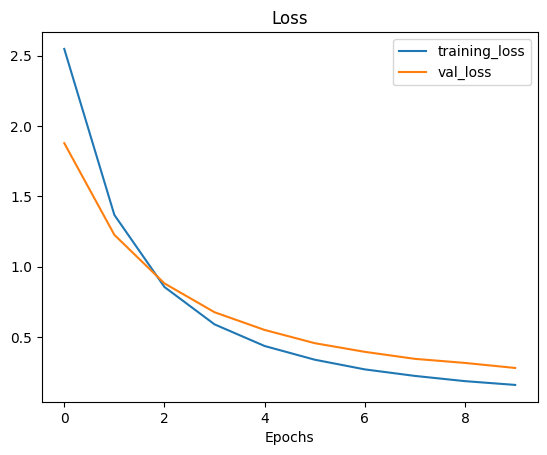

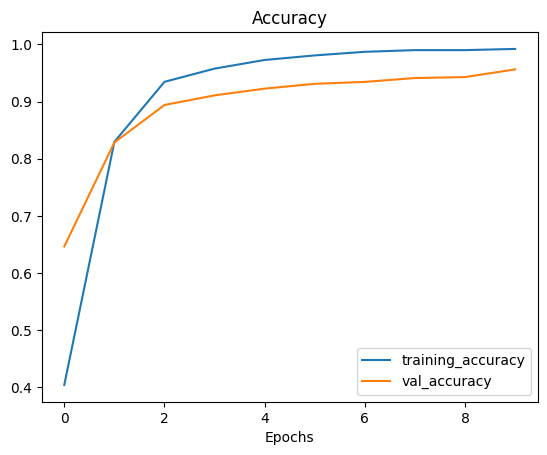

In [ ]:
plot_loss_curves(efficientnet_history)

In [ ]:
mobilenet_model = create_model(model_url=mobilenet_url,
                                  num_classes=train_data.num_classes)

mobilenet_model.compile(loss='categorical_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

In [ ]:
mobilenet_history = mobilenet_model.fit(train_data,
                                              epochs=10,
                                              steps_per_epoch=len(train_data),
                                              validation_data=test_data,
                                              validation_steps=len(test_data),)

Epoch 1/10
75/75 [==============================] - 41s 287ms/step - loss: 2.2142 - accuracy: 0.4345 - val_loss: 1.3284 - val_accuracy: 0.7121
Epoch 2/10
75/75 [==============================] - 18s 241ms/step - loss: 0.8114 - accuracy: 0.8697 - val_loss: 0.7789 - val_accuracy: 0.8384
Epoch 3/10
75/75 [==============================] - 18s 244ms/step - loss: 0.4427 - accuracy: 0.9458 - val_loss: 0.5310 - val_accuracy: 0.9007
Epoch 4/10
75/75 [==============================] - 20s 263ms/step - loss: 0.2822 - accuracy: 0.9731 - val_loss: 0.4028 - val_accuracy: 0.9259
Epoch 5/10
75/75 [==============================] - 19s 251ms/step - loss: 0.2008 - accuracy: 0.9861 - val_loss: 0.3327 - val_accuracy: 0.9343
Epoch 6/10
75/75 [==============================] - 18s 244ms/step - loss: 0.1523 - accuracy: 0.9912 - val_loss: 0.2763 - val_accuracy: 0.9545
Epoch 7/10
75/75 [==============================] - 19s 248ms/step - loss: 0.1168 - accuracy: 0.9950 - val_loss: 0.2390 - val_accuracy: 0.9596

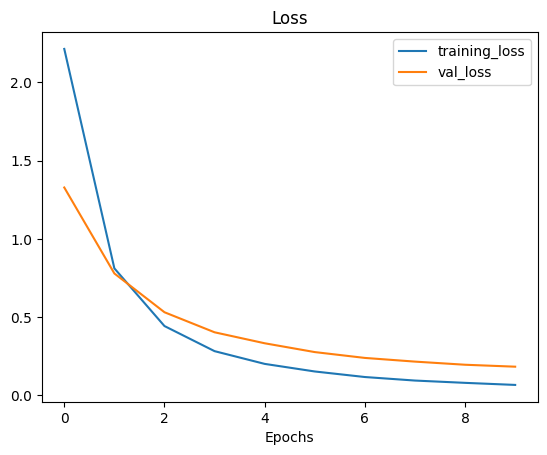

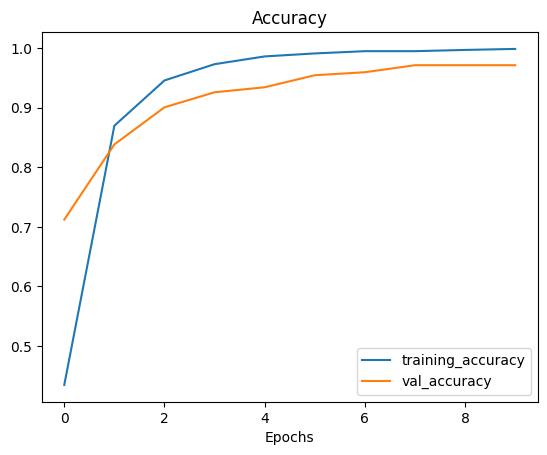

In [ ]:
plot_loss_curves(mobilenet_history)

In [ ]:
fine_model = resnet_model

In [ ]:

fine_model.trainable = True

for layer in fine_model.layers[:-10]:
  layer.trainable = False

fine_model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
fine_model.layers

In [ ]:
history_fine = fine_model.fit(train_data,
                epochs=10,
                validation_data=test_data,
                validation_steps=int(0.25 * len(test_data)),)


Epoch 1/10
75/75 [==============================] - 61s 386ms/step - loss: 0.9047 - accuracy: 0.8185 - val_loss: 10.3941 - val_accuracy: 0.1406
Epoch 2/10
75/75 [==============================] - 25s 329ms/step - loss: 0.4875 - accuracy: 0.9424 - val_loss: 1.6650 - val_accuracy: 0.6641
Epoch 3/10
75/75 [==============================] - 25s 338ms/step - loss: 0.4377 - accuracy: 0.9634 - val_loss: 1.8694 - val_accuracy: 0.7109
Epoch 4/10
75/75 [==============================] - 25s 336ms/step - loss: 0.4158 - accuracy: 0.9794 - val_loss: 1.4428 - val_accuracy: 0.8438
Epoch 5/10
75/75 [==============================] - 25s 337ms/step - loss: 0.4447 - accuracy: 0.9693 - val_loss: 1.0551 - val_accuracy: 0.7969
Epoch 6/10
75/75 [==============================] - 25s 334ms/step - loss: 0.5497 - accuracy: 0.9387 - val_loss: 1.6309 - val_accuracy: 0.7188
Epoch 7/10
75/75 [==============================] - 26s 338ms/step - loss: 0.4557 - accuracy: 0.9706 - val_loss: 0.4946 - val_accuracy: 0.937

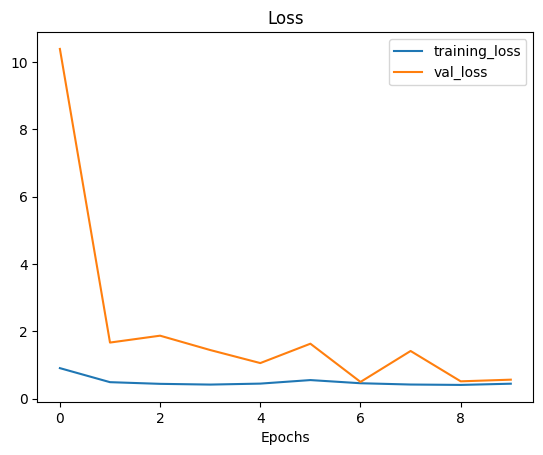

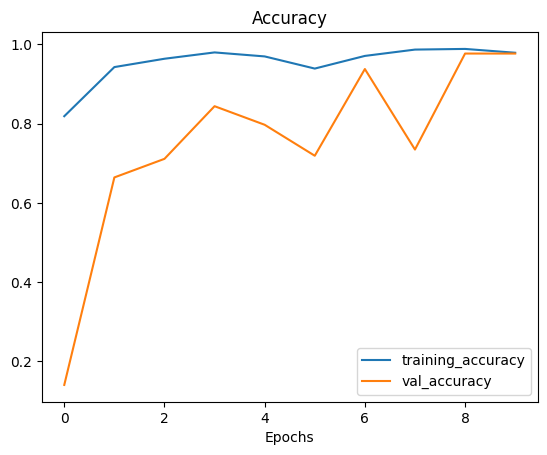

In [ ]:
plot_loss_curves(history_fine)